In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from scipy import stats
import matplotlib.pyplot as plt

# House Price Prediction

This code includes house price prediction from a dataset in kaggle

In [2]:
# reading the csv file
house_price = pd.read_csv('../input/house-price-tehran-iran/housePrice.csv')

# Dropping the nan values
house_price = house_price.dropna()

# renaming price(usd) to something useful
#house_price.rename({'Price(USD)':"Price_usd"}, axis='columns')

# finding categorial columns
#house_price.dtypes

# it seems that the first column (area) is an object and it shouldn't be
# so we have to change the type to int
# But There is a comma in some of the area column values and it needs to be removed
house_price['Area'] = house_price['Area'].str.replace(",","")
house_price['Area'] = house_price['Area'].astype(int, errors = 'raise')

# the boolean columns need to be converted to int
house_price['Parking'] = house_price['Parking'].astype(int, errors = 'raise')
house_price['Warehouse'] = house_price['Warehouse'].astype(int, errors = 'raise')
house_price['Elevator'] = house_price['Elevator'].astype(int, errors = 'raise')
#house_price.dtypes

# the address column can be converted using one hot or ordinal encoding
# but there is no order in address so one hot encodeing sounds reasonable
# But it seems there are 193 different values in this coulmn and it makes it difficult
# to predict (due to shortage of data), so dropping the address column seems more reasonable
Address = house_price.select_dtypes('object')
house_price_ = house_price.select_dtypes(exclude=['object'])
house_price__ = house_price.select_dtypes(exclude=['object'])

# mean and standard diviation of area seems to high
# and there are outliers in the dataset that have to be removed using z-score
house_price_ = house_price_[(np.abs(stats.zscore(house_price_)) < 3).all(axis=1)]

house_price_.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3068.000000,3068.000000,3068.000000,3068.0,3068.000000,3.068000e+03,3068.000000
mean,102.539439,2.059974,0.891786,1.0,0.815189,4.599520e+09,153317.328364
std,56.528724,0.676342,0.310701,0.0,0.388207,4.689708e+09,156323.607191
min,30.000000,0.000000,0.000000,1.0,0.000000,5.500000e+07,1833.330000
25%,70.000000,2.000000,1.000000,1.0,1.000000,1.579875e+09,52662.502500
50%,90.000000,2.000000,1.000000,1.0,1.000000,2.999500e+09,99983.335000
75%,120.000000,2.000000,1.000000,1.0,1.000000,6.000000e+09,200000.000000
max,1000.000000,4.000000,1.000000,1.0,1.000000,2.970000e+10,990000.000000


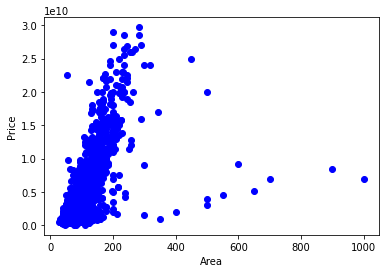

In [3]:
# Defining feature and target value
X_simple = house_price_[['Area']]

# it seems warehouse has zero std, so we can ignore that feature
# also, parking and elevator features seems to have a near 1 mean, so it might be 
# a good idea to ignore them, too
X_all = house_price_[['Area', 'Room']]
Y = house_price_.Price

# Defining train and test
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(X_simple,Y, test_size = 0.2)
x_train_a,x_test_a,y_train_a,y_test_a=train_test_split(X_all,Y, test_size = 0.2)

plt.scatter(x_train_s, y_train_s, c='b')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Simple linear regression using area data

In [4]:
# Fit using linear regression
my_model_lr = linear_model.LinearRegression()
my_model_lr.fit(x_train_s,y_train_s)

# calculating y hat using our linear model parameters
#y_hat_s = my_model_lr.coef_ * x_train_s + my_model_lr.intercept_

# predict y hat for test set
y_prediction_lr = my_model_lr.predict(x_test_s)

# printing r2 score to see how good our model perform
print(sklearn.metrics.r2_score(y_test_s, y_prediction_lr))

0.32709739045334485


our linear simple model, seems to have a very low r2 score
maybe we have to try more feature or a non-linear model

# Multi-parameter linear model

In [5]:
# Fit using linear regression
my_model_mlr = linear_model.LinearRegression()
my_model_mlr.fit(x_train_a,y_train_a)

# calculating y hat using our linear model parameters
#y_hat_s = my_model_lr.coef_ * x_train_s + my_model_lr.intercept_

# predict y hat for test set
y_prediction_mlr = my_model_mlr.predict(x_test_a)

# printing r2 score to see how good our model perform
print(sklearn.metrics.r2_score(y_test_a, y_prediction_mlr))
print(my_model_mlr.coef_,my_model_mlr.intercept_)

0.4518212882027216
[3.19869856e+07 2.41460620e+09] -3660948882.210291


it seems that our multi-feature model has a poor score. it might be a good idea to use a more complex model.

# Multi-feature polynomial regression

In [6]:
# defining polynomial with x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
feat_poly_train = polynomial.fit_transform(x_train_a)
feat_poly_test = polynomial.fit_transform(x_test_a)

# using linear regression to fit the data
regression = linear_model.LinearRegression()
my_model_plr = regression.fit(feat_poly_train, y_train_a)

# predict y hat for test set
y_prediction_plr = my_model_plr.predict(feat_poly_test)

# printing r2 score to see how good our model perform
print(sklearn.metrics.r2_score(y_test_a, y_prediction_plr))
print(my_model_plr.coef_,my_model_plr.intercept_)

0.6470011817761634
[-5.44091097e+07 -7.23700609e+09 -2.15056886e+05  1.21022953e+08
  5.31120408e+08  2.29885692e+02 -7.22798205e+04 -9.59431458e+06
 -1.56772443e+08] 6319134194.813423


It seems better!
But let's try someting else.
in previous stages, we had ignore "address" feature, due to shortage of data and having lots of features.
at this point, it seems the right path is using that omitted feature!

In [7]:
# one-hot encoding the categorial feature: address
#oh_encoded_address = pd.get_dummies(Address)

# concating oh encoded address to datasets
#house_price_ad = pd.concat([house_price__, oh_encoded_address], axis=1)

# defining features and target value
#x_ad = house_price_ad.loc[:, ~house_price_ad.columns.isin(['Price', 'Price(USD)'])]
#y_ad = house_price_ad.Price

#house_price_ad.describe()

In [8]:
# splitting train/test
#x_train_ad,x_test_ad,y_train_ad,y_test_ad=train_test_split(x_ad,y_ad, test_size = 0.2)

# defining polynomial with x^2 and x^3
#polynomial_ad = PolynomialFeatures(degree=3, include_bias=False)
#feat_poly_train_ad = polynomial_ad.fit_transform(x_train_ad)
#feat_poly_test_ad = polynomial_ad.fit_transform(x_test_ad)

# using linear regression to fit the data
#regression_ad = linear_model.LinearRegression()
#my_model_plr_ad = regression_ad.fit(feat_poly_train_ad, y_train_ad)

# predict y hat for test set
#y_prediction_plr_ad = my_model_plr_ad.predict(feat_poly_test_ad)

# printing r2 score to see how good our model perform
#print(sklearn.metrics.r2_score(y_test_ad, y_prediction_plr_ad))